In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


In [2]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')
sample_submission = pd.read_csv('sample_submission.csv')

/var/folders/b9/bmsjjm2x30vcw342sbqf10xw0000gn/T/ipykernel_96962/2463594696.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train_data.csv')


In [3]:
train_df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [4]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [5]:
missing_values = train_df.isnull().sum()
missing_values[missing_values > 0]

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Nature of Injury Description    593471
WCIO Cause of Injury Code              35085
WCIO Cause

In [6]:
train_df.describe()


,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.000000,5.453750e+05,544948.000000,5.934710e+05,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574026.000000,574026.000000
mean,42.114270,4.910883e+02,1886.767604,2.366760e+07,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,0.046665,3.006559
std,14.256432,6.092918e+03,414.644423,1.079271e+08,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,0.210921,2.000801
min,0.000000,0.000000e+00,0.000000,5.393066e+06,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,5.593414e+06,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,5.791212e+06,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,5.991000e+06,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,9.998917e+08,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,1.000000,6.000000


In [7]:
train_df = train_df.dropna(subset=['Claim Injury Type']).reset_index(drop=True)


In [8]:
train_df['Claim Injury Type'] = train_df['Claim Injury Type'].astype(str)


In [9]:
train_df['Claim Injury Type Num'] = train_df['Claim Injury Type'].str.extract('^(\d+)').astype(int)


In [10]:
train_df = train_df.drop(columns=['Claim Injury Type'])


In [11]:
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:")
print(categorical_cols)

Categorical columns:
['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender', 'Industry Code Description', 'Medical Fee Region', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Zip Code', 'WCB Decision']


In [12]:
for col in categorical_cols:
    print(f"{col}: {train_df[col].nunique()} unique values")

Accident Date: 5539 unique values
Alternative Dispute Resolution: 3 unique values
Assembly Date: 897 unique values
Attorney/Representative: 2 unique values
C-2 Date: 2475 unique values
C-3 Date: 1648 unique values
Carrier Name: 2046 unique values
Carrier Type: 8 unique values
County of Injury: 63 unique values
COVID-19 Indicator: 2 unique values
District Name: 8 unique values
First Hearing Date: 1094 unique values
Gender: 4 unique values
Industry Code Description: 20 unique values
Medical Fee Region: 5 unique values
WCIO Cause of Injury Description: 74 unique values
WCIO Nature of Injury Description: 56 unique values
WCIO Part Of Body Description: 54 unique values
Zip Code: 10060 unique values
WCB Decision: 1 unique values


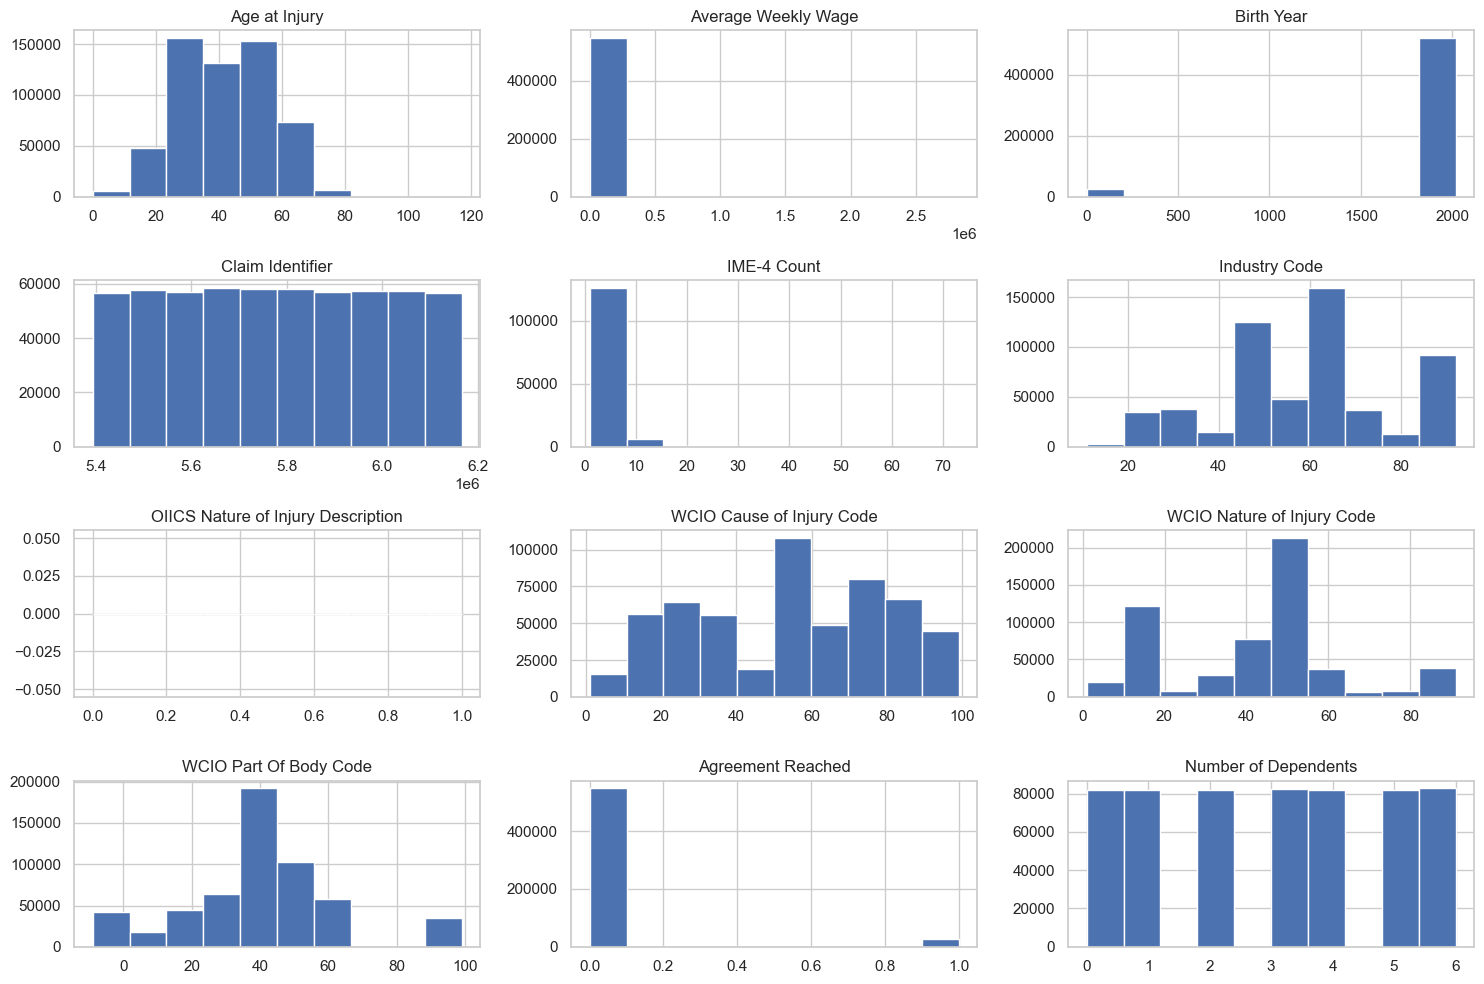

In [13]:
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Claim Injury Type Num')  # Exclude target variable if present

train_df[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

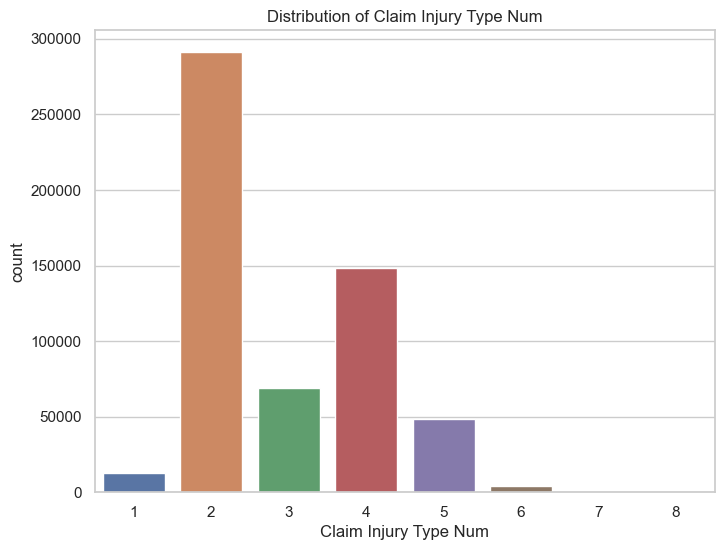

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Claim Injury Type Num', data=train_df)
plt.title('Distribution of Claim Injury Type Num')
plt.show()

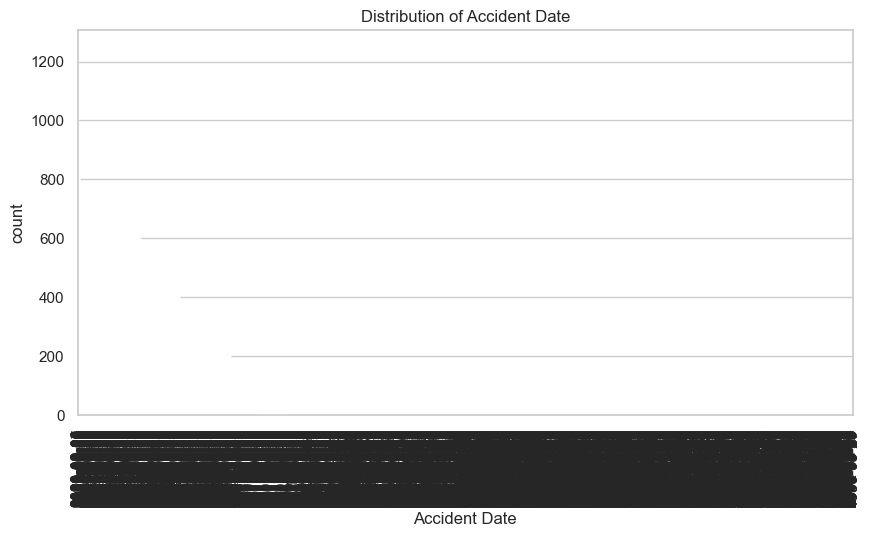

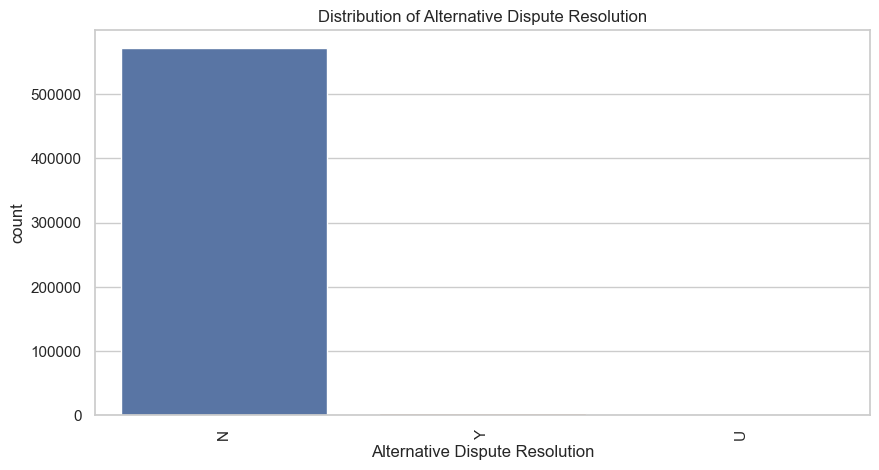

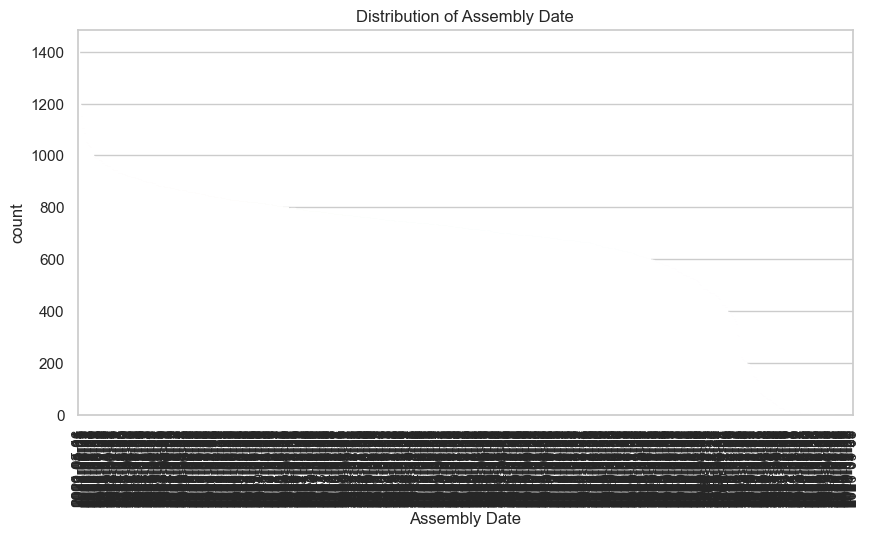

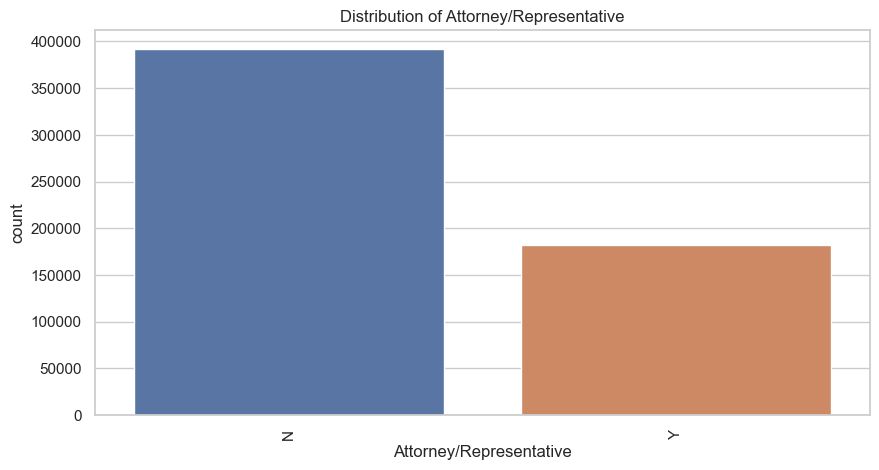

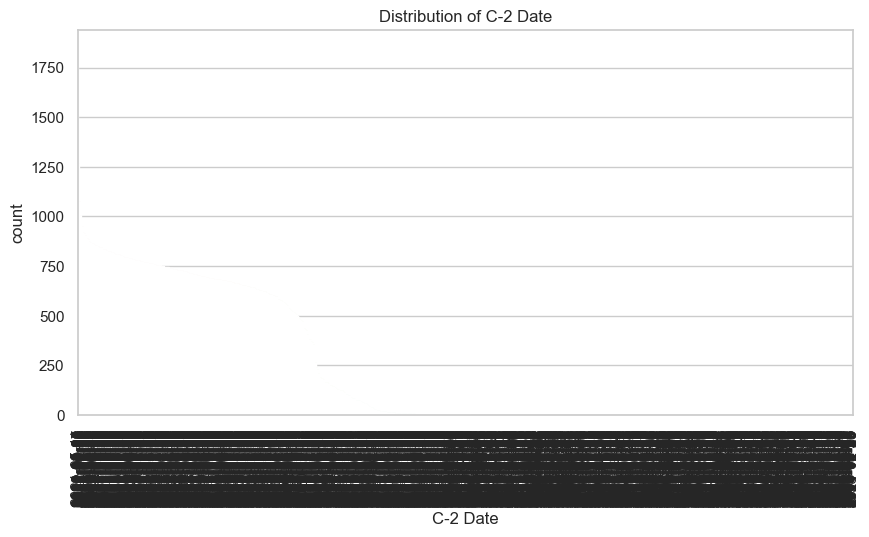

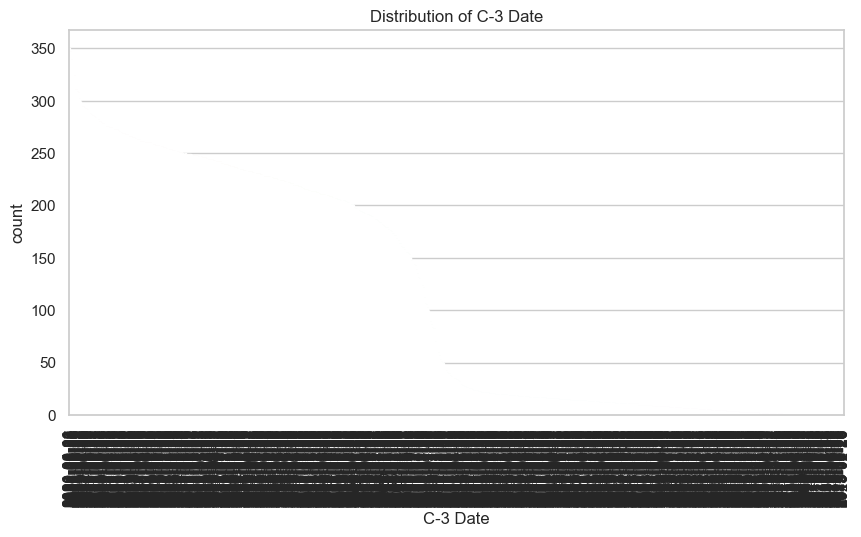

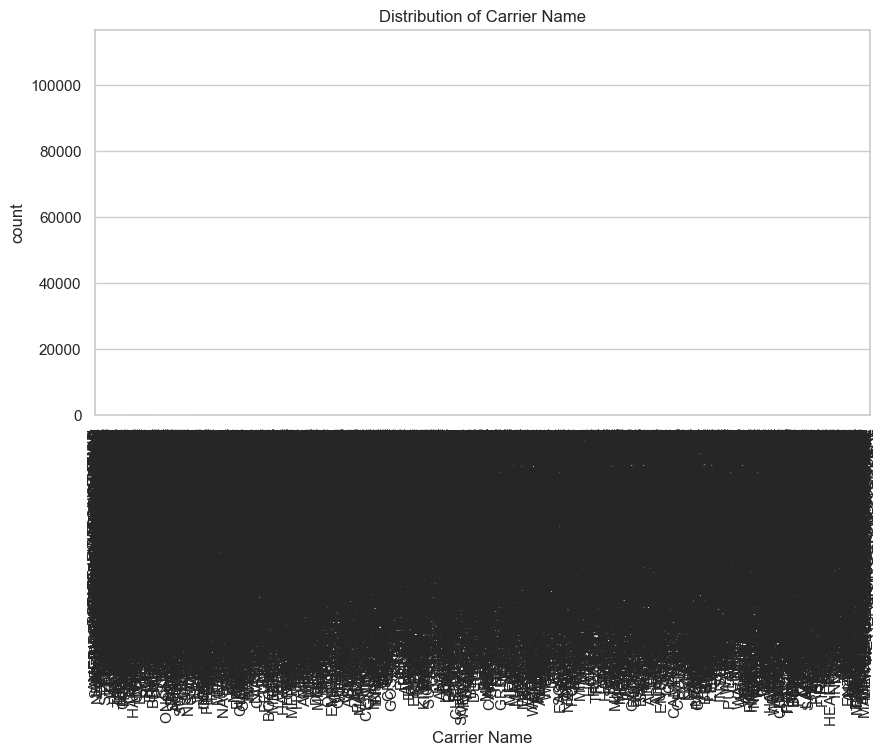

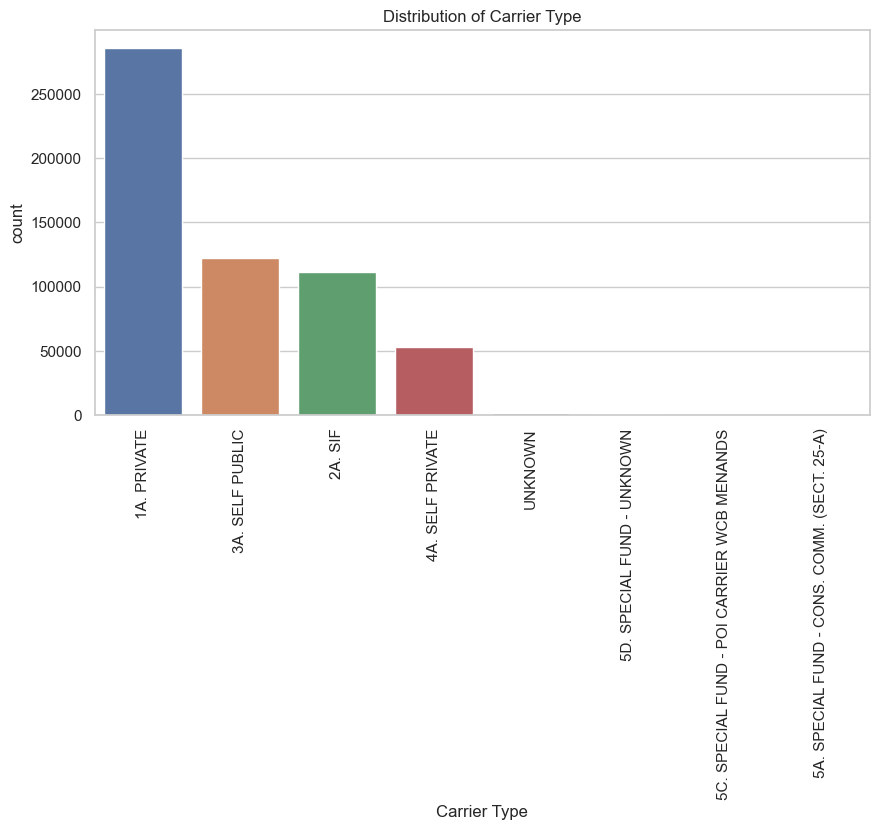

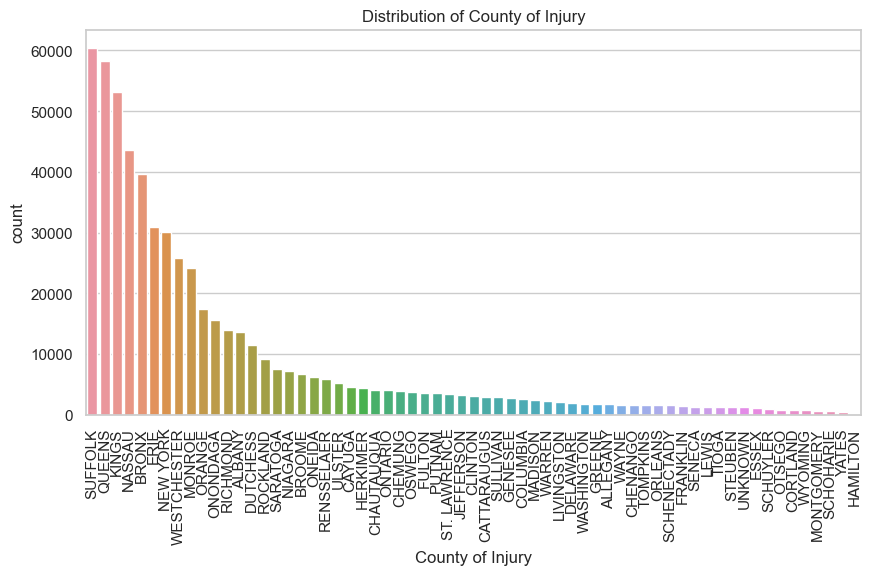

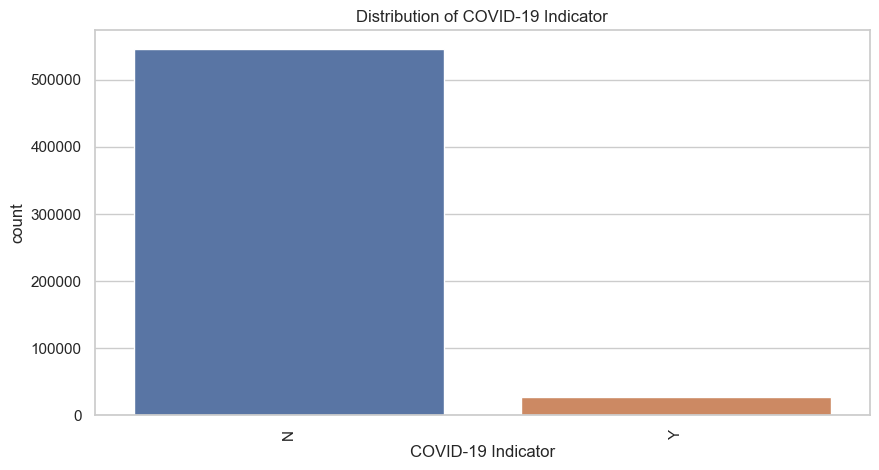

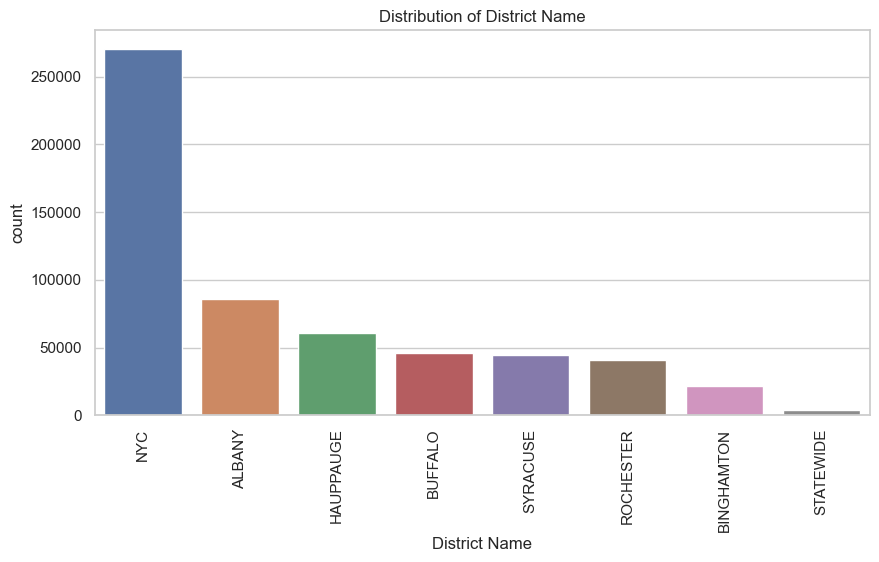

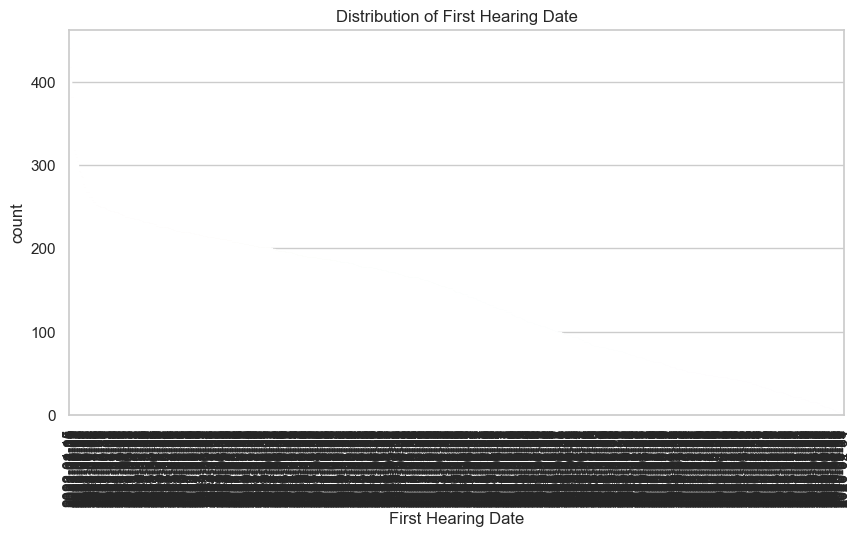

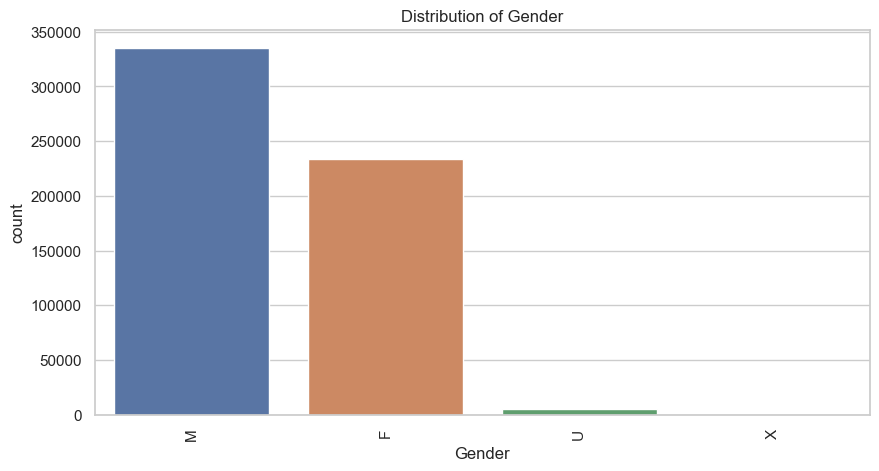

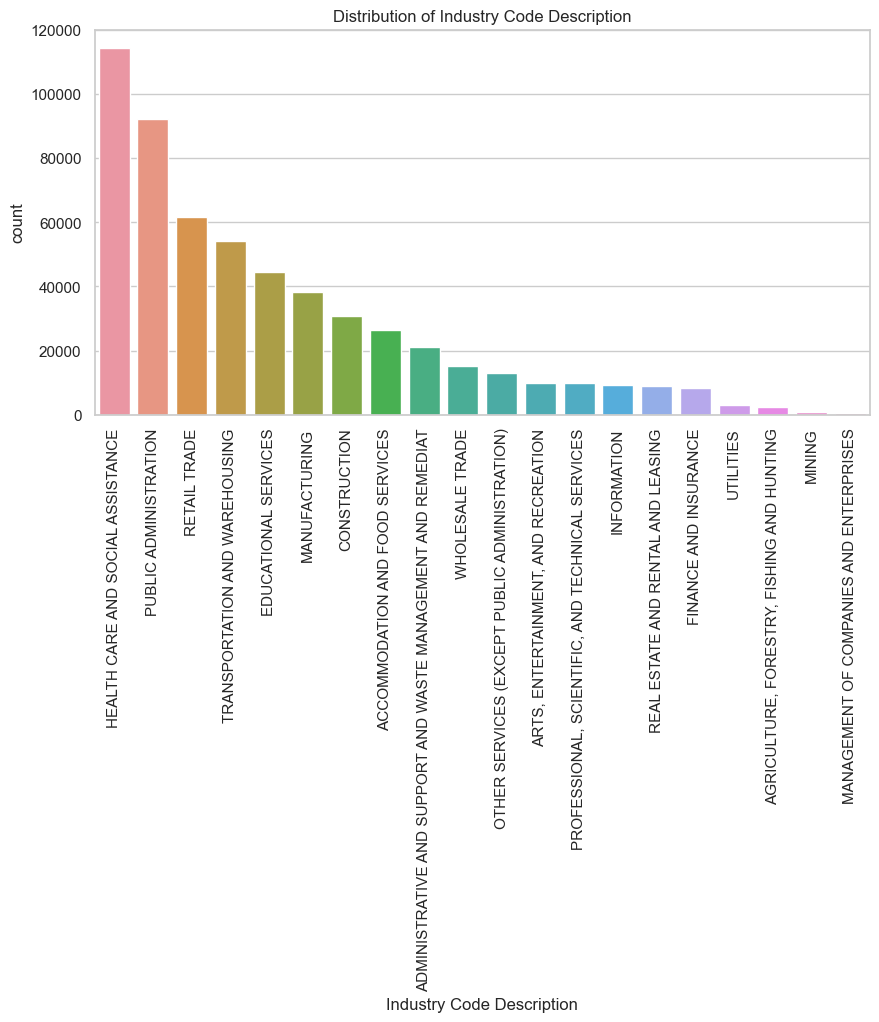

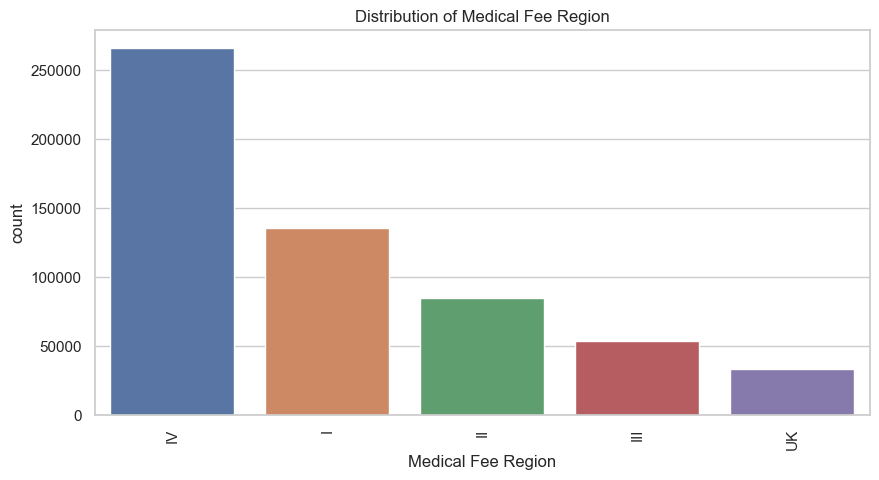

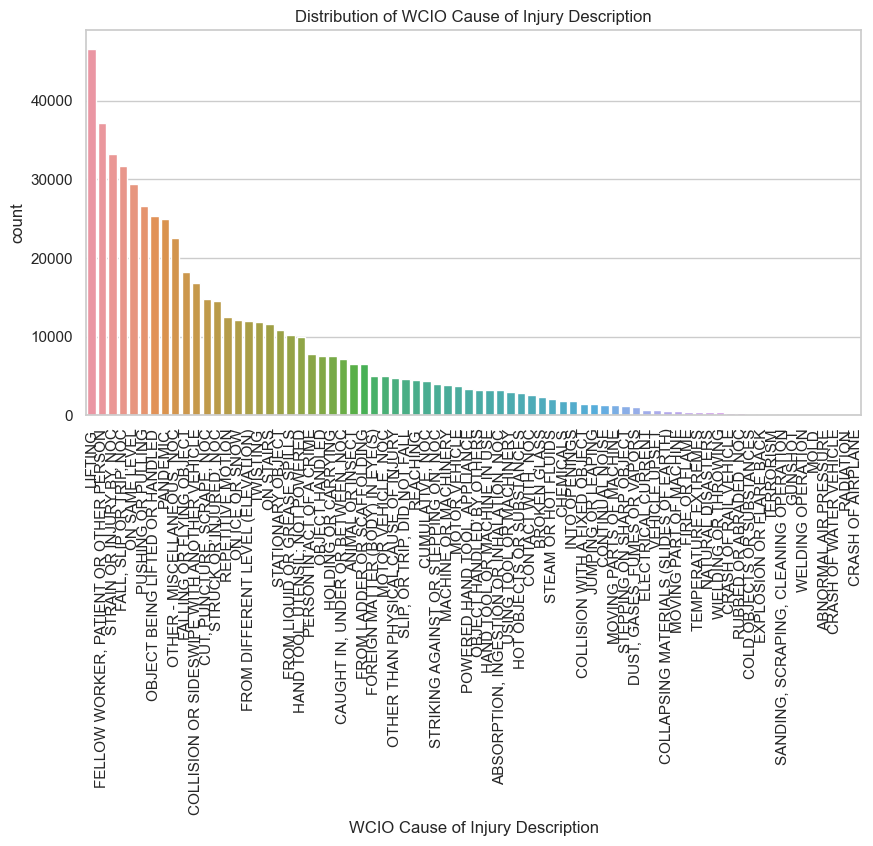

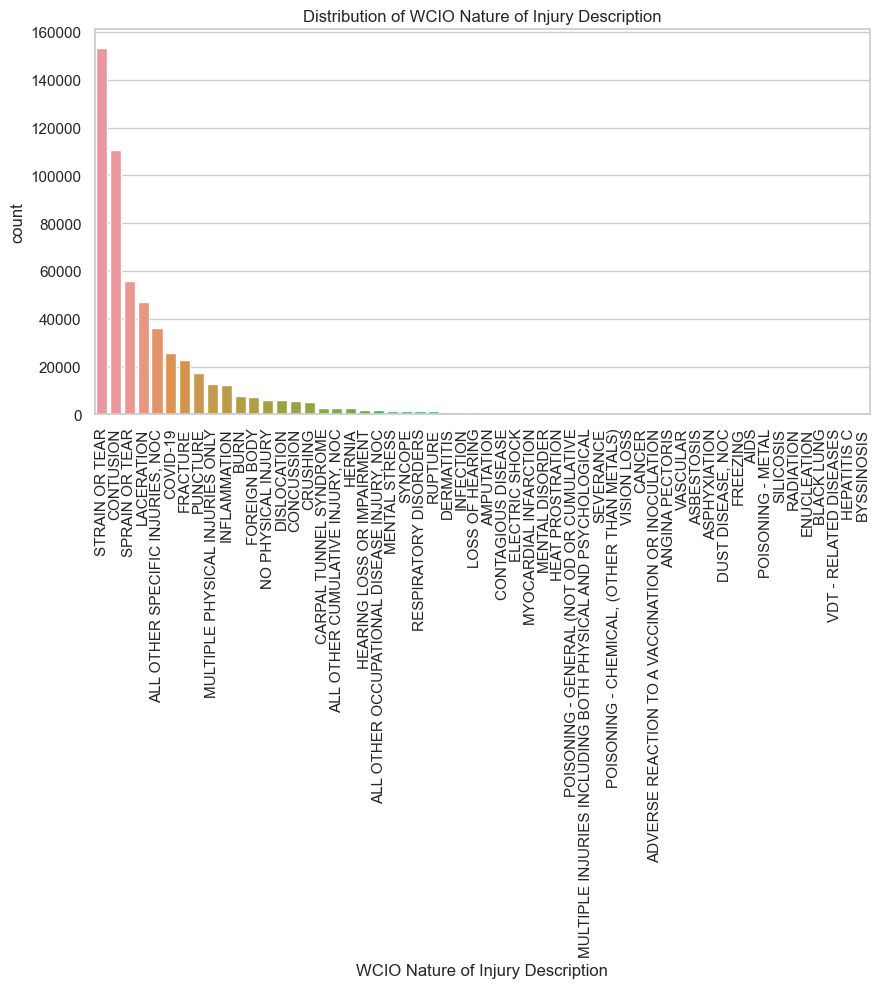

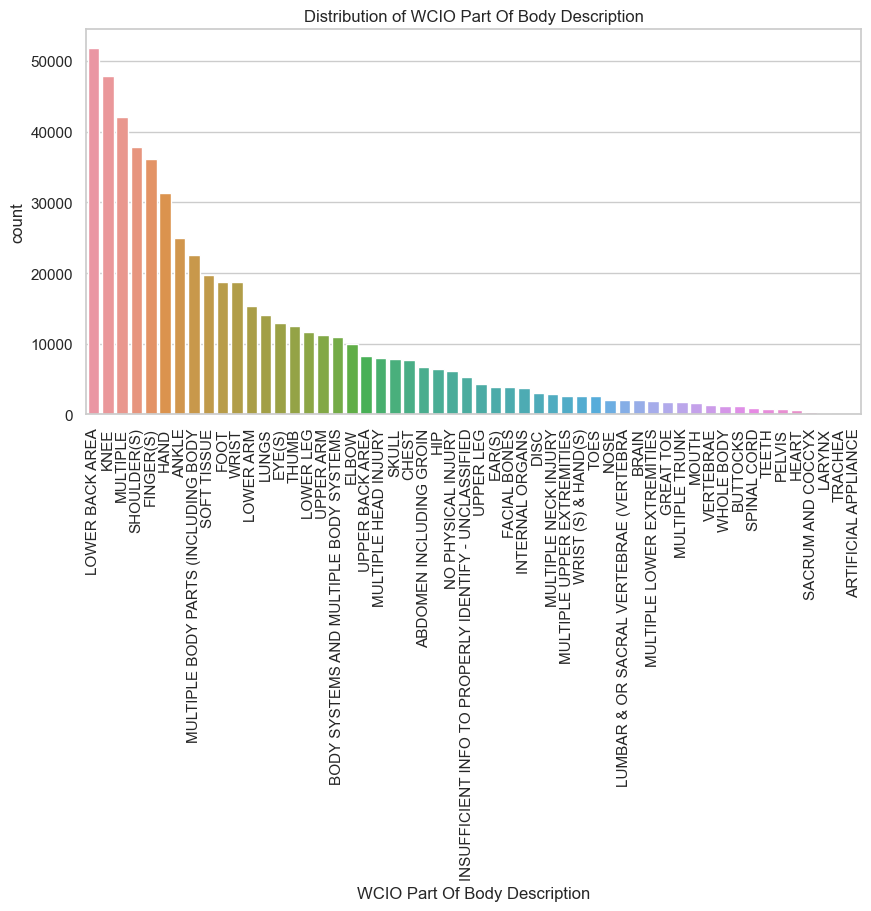

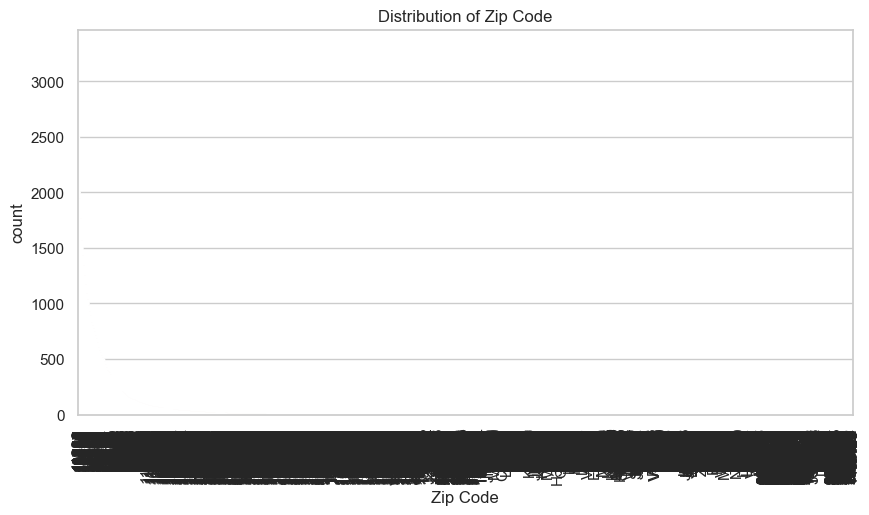

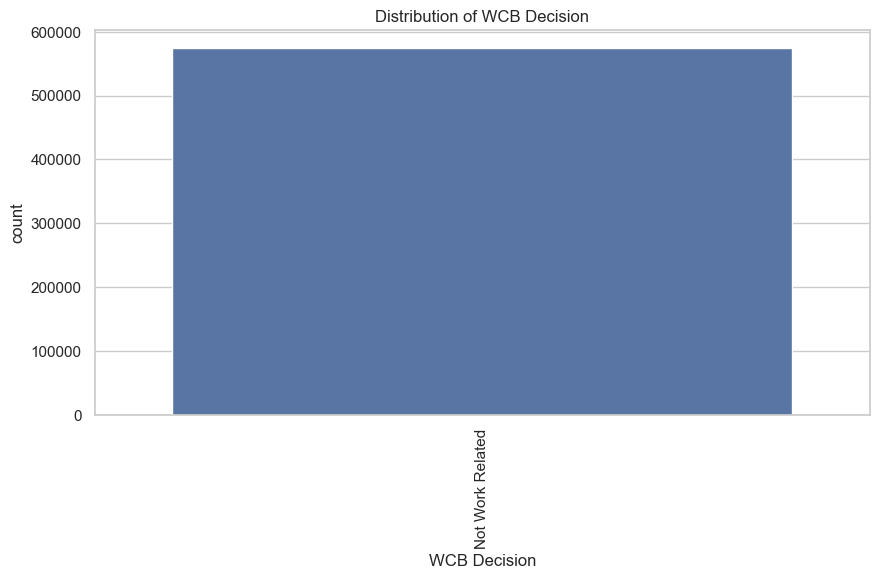

In [15]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_df, x=col, order=train_df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col}')
    plt.show()

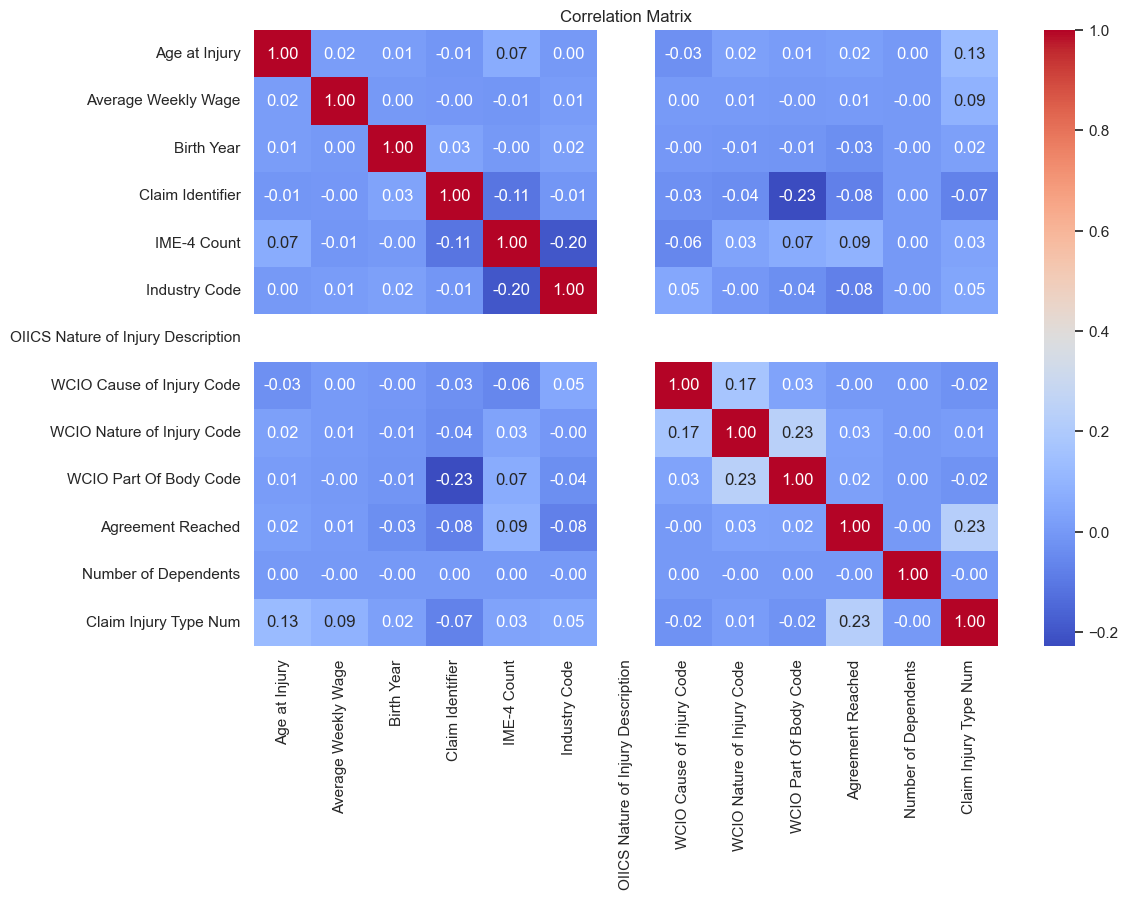

In [16]:
corr_matrix = train_df[numerical_cols + ['Claim Injury Type Num']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

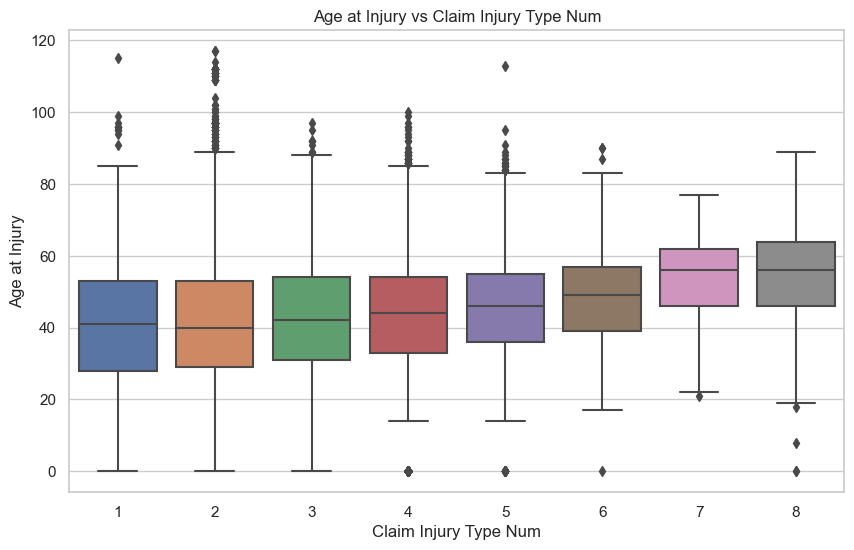

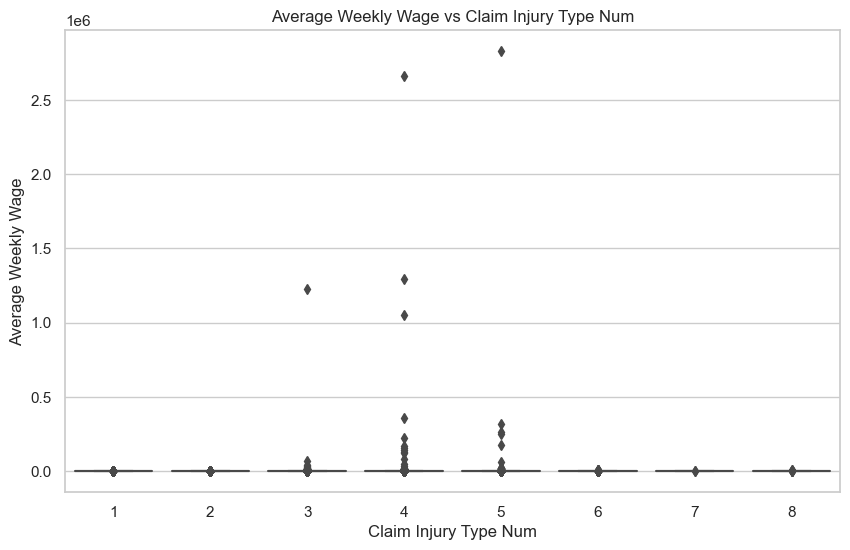

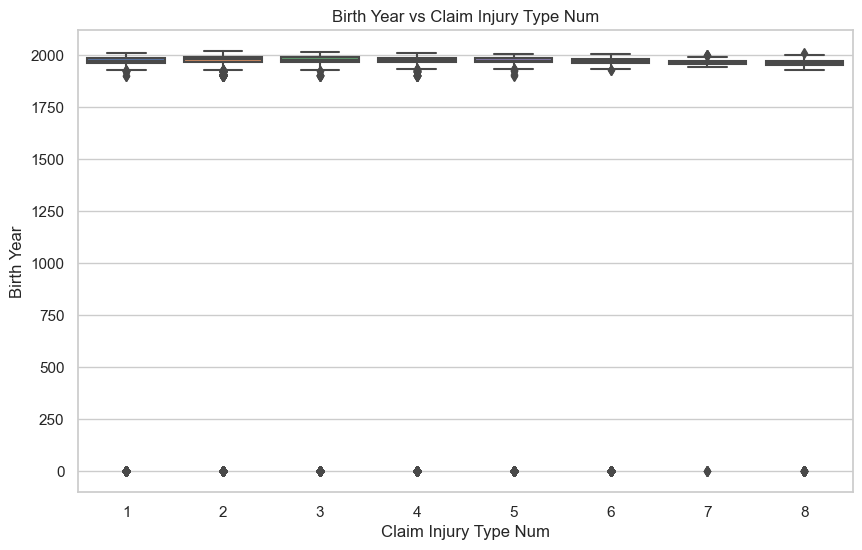

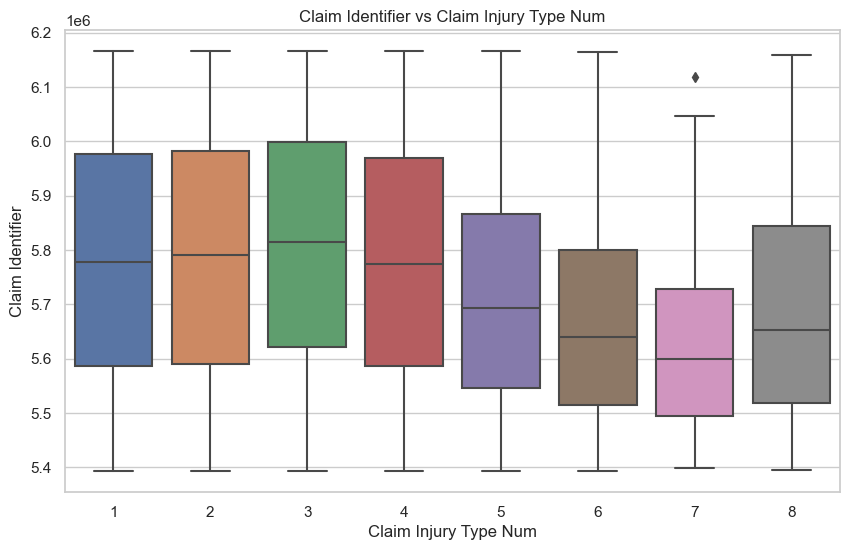

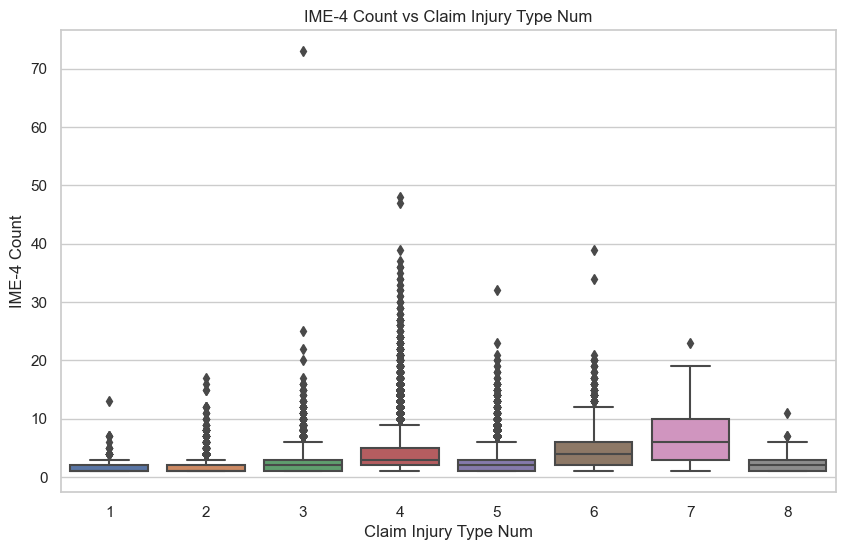

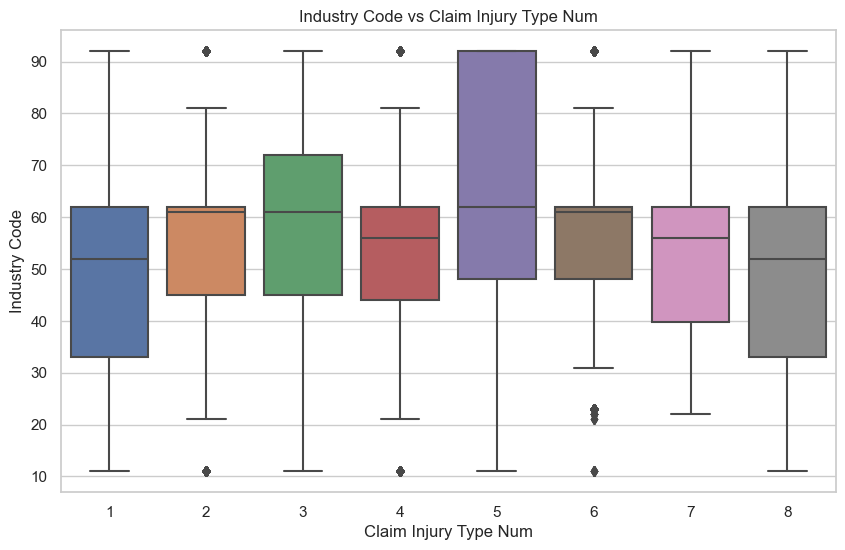

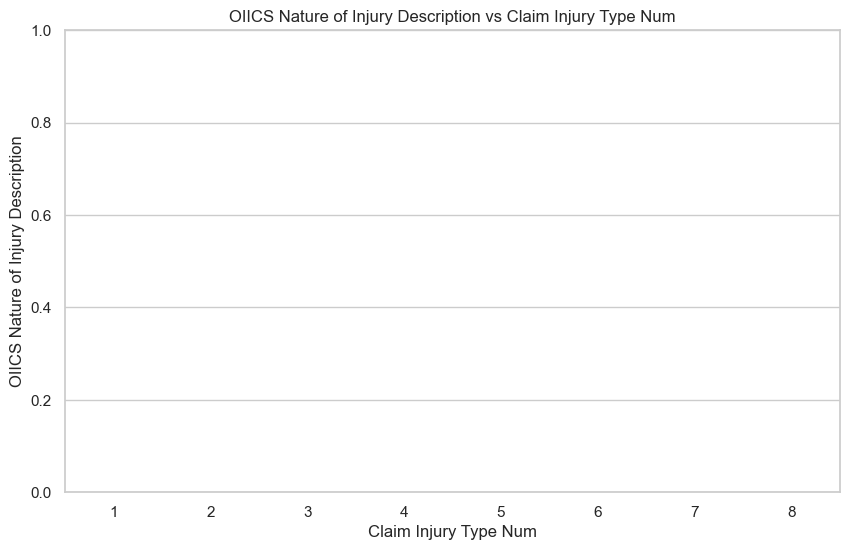

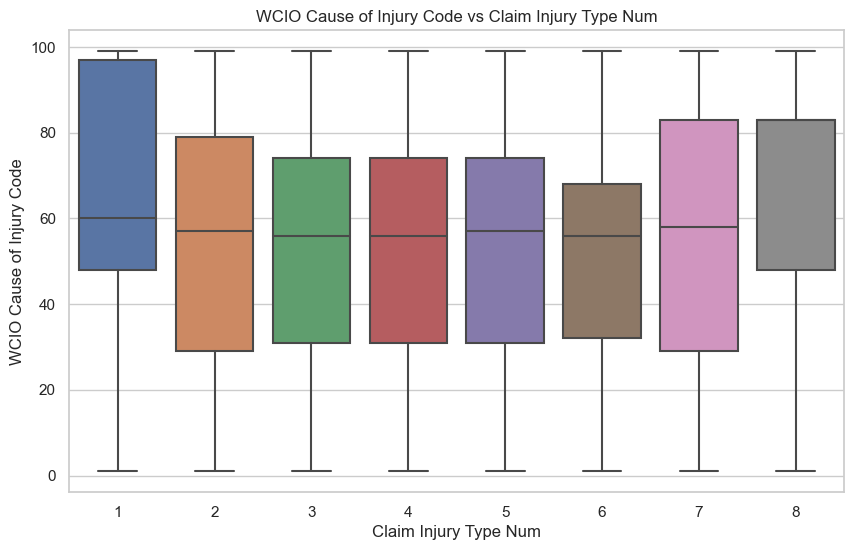

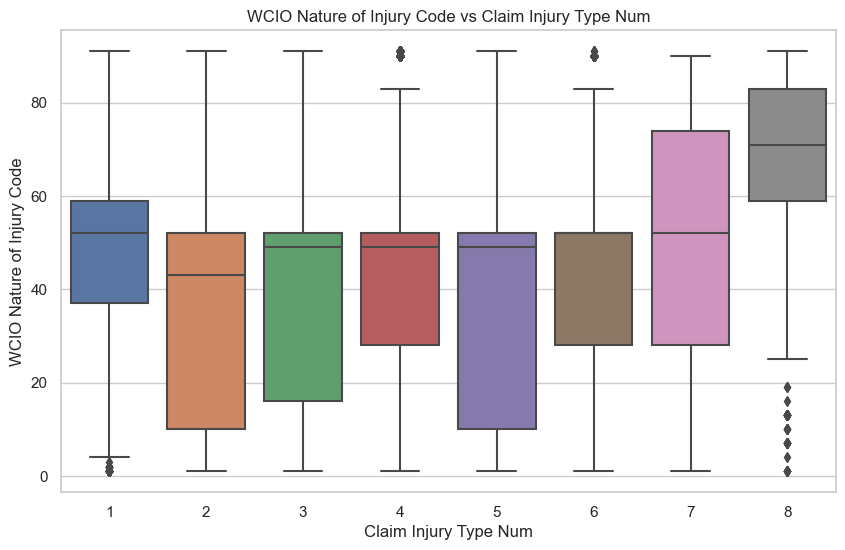

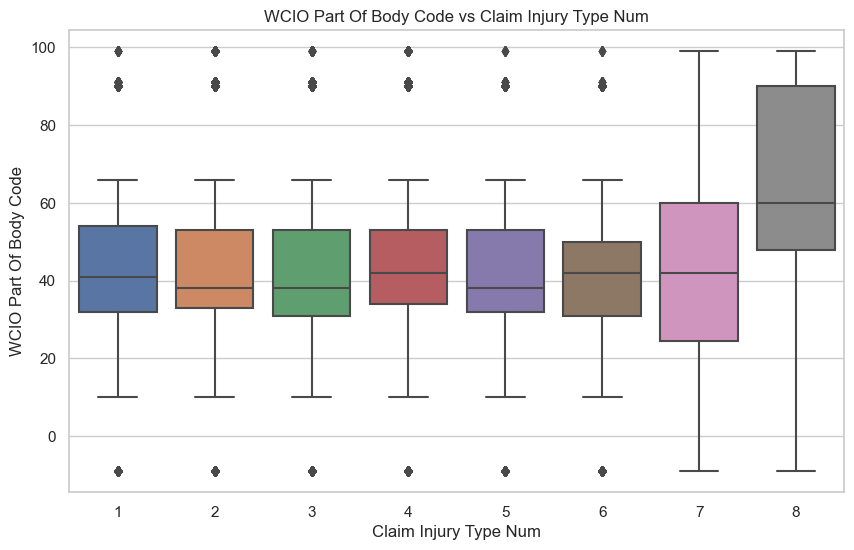

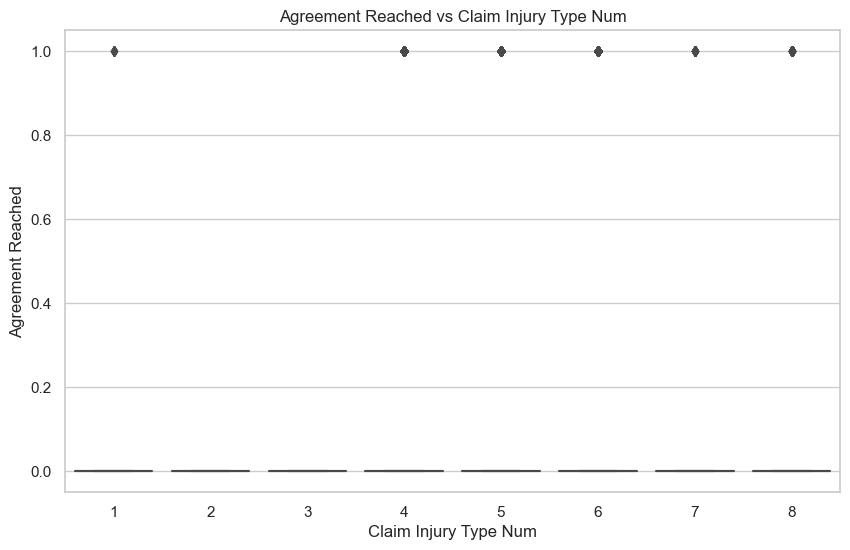

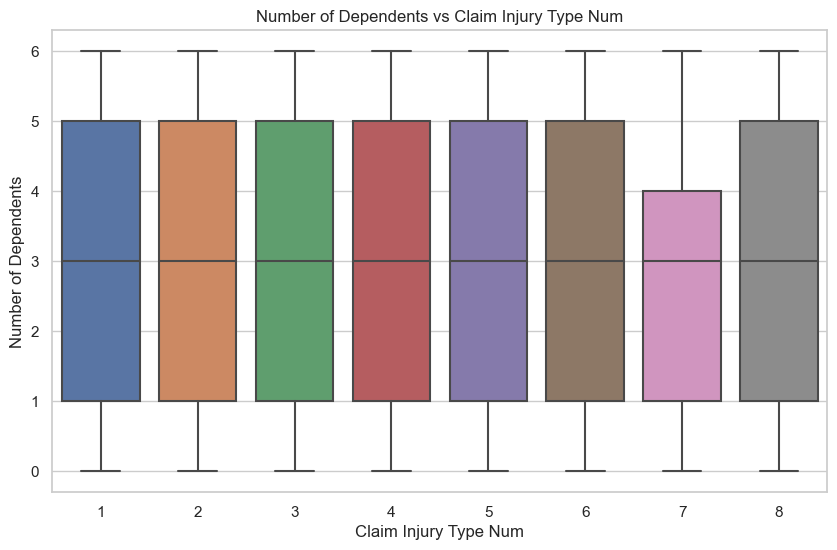

In [17]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Claim Injury Type Num', y=col, data=train_df)
    plt.title(f'{col} vs Claim Injury Type Num')
    plt.show()